In [1]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
import scipy.stats as stat
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn import metrics

C:\Users\harsmoha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
titanic = pd.read_csv('Titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
np.sum(titanic.Survived)

342

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanicDF = titanic.iloc[:,(list(range(1,3)) + list(range(4,8)) + list(range(9,12)))]
titanicDF.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
titanicDF.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
#Useful in finding missing values all at once in df
titanicDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [8]:
print (len(titanicDF.Embarked.unique()))

4


In [9]:
print (len(titanicDF.Cabin.unique()))

148


In [10]:
print (len(titanicDF.Pclass.unique()))

3


In [11]:
#Checking if age is normally distributed
print (titanicDF.Age.median())

28.0


In [12]:
print (titanicDF.Age.mode())

0    24.0
dtype: float64


In [13]:
print (titanicDF.Cabin.mode())

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object


In [14]:
print ((titanicDF.Fare.isnull().sum()))
#No missing value in Fare

0


In [15]:
titanicDF.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
#get row at a particular index
print (titanicDF.iloc[33])

Survived       0
Pclass         2
Sex         male
Age           66
SibSp          0
Parch          0
Fare        10.5
Cabin        NaN
Embarked       S
Name: 33, dtype: object


In [17]:
#Outlier treatment
age_99 = titanicDF.Age.quantile(0.99)
list1 = titanicDF[(titanicDF['Age']>age_99)].Age.index
titanicDF.iloc[list1]
#for i in titanicDF[(titanicDF['Age']>=age_99)].Age.index:
#titanicDF1 = titanicDF.drop(titanicDF.index[titanicDF[(titanicDF['Age']>age_99)].Age.index]).copy()
#titanicDF.drop(titanicDF.index[titanicDF[(titanicDF['Age']>age_99)].Age.index])
#titanicDF1.reset_index()
#titanicDF.reset_index()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
33,0,2,male,66.0,0,0,10.5000,NaN,S
96,0,1,male,71.0,0,0,34.6542,A5,C
116,0,3,male,70.5,0,0,7.7500,NaN,Q
493,0,1,male,71.0,0,0,49.5042,NaN,C
630,1,1,male,80.0,0,0,30.0000,A23,S
672,0,2,male,70.0,0,0,10.5000,NaN,S
745,0,1,male,70.0,1,1,71.0000,B22,S
851,0,3,male,74.0,0,0,7.7750,NaN,S


In [18]:
from scipy import stats

In [19]:
#tDF = titanicDF[(np.abs(stats.zscore(titanicDF)) < 3).all(axis=1)]
#tDF.describe()

In [20]:
#MIssing value treatment
from sklearn.preprocessing import Imputer

In [21]:
imp = Imputer(axis=0,strategy='median',missing_values='NaN')
temp = imp.fit_transform(titanicDF.Age.reshape(-1,1))
titanicDF['Age'] = temp
titanicDF.head(10)

C:\Users\harsmoha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\harsmoha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,28.0,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


In [22]:
#titanicDF1 = titanicDF.drop(titanicDF.index[titanicDF[(titanicDF['Age']>age_99)].Age.index]).copy()
#titanicDF1 = titanicDF.drop(titanicDF.index[titanicDF[(titanicDF['Age']>age_99)].Age.index])
#titanicDF1 = titanicDF.iloc[titanicDF.index[titanicDF[(titanicDF['Age']<=age_99)].Age.index]]
titanicDF1 = titanicDF[(titanicDF['Age']<=age_99)]
#titanicDF1.iloc[list1]
titanicDF1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,0.386183,2.313703,28.979241,0.526614,0.383918,32.244922
std,0.487149,0.834424,12.434636,1.106630,0.808719,49.873367
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,65.000000,8.000000,6.000000,512.329200


In [23]:
titanicDF1.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
886,0,2,male,27.0,0,0,13.00,NaN,S
887,1,1,female,19.0,0,0,30.00,B42,S
888,0,3,female,28.0,1,2,23.45,NaN,S
889,1,1,male,26.0,0,0,30.00,C148,C
890,0,3,male,32.0,0,0,7.75,NaN,Q


In [24]:
#titanicDF1.reset_index()
sibsp_99 = titanicDF1.SibSp.quantile(0.99)
titanicDF2 = titanicDF1[(titanicDF1['SibSp']<=sibsp_99)]
#titanicDF2 = titanicDF1.iloc[titanicDF1.index[titanicDF1[(titanicDF1['SibSp']<=sibsp_99)].SibSp.index]]
titanicDF2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000
mean,0.389269,2.308219,28.987066,0.466895,0.371005,31.946822
std,0.487863,0.835485,12.483965,0.885464,0.798873,49.960277
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,30.500000
max,1.000000,3.000000,65.000000,5.000000,6.000000,512.329200


In [25]:
#titanicDF2.reset_index()
parch_99 = titanicDF2.Parch.quantile(0.99)
titanicDF3 = titanicDF2[(titanicDF2['Parch']<=parch_99)]
titanicDF3.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000
mean,0.390805,2.303448,28.912264,0.465517,0.337931,31.926168
std,0.488211,0.836378,12.493527,0.887495,0.694088,50.129092
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.400000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,30.070800
max,1.000000,3.000000,65.000000,5.000000,4.000000,512.329200


In [26]:
Fare_99 = titanicDF3.Fare.quantile(0.99)
titanicDF4 = titanicDF3[(titanicDF3['Fare']<=Fare_99)]
titanicDF4.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,0.386760,2.317073,28.895087,0.454123,0.324042,28.643471
std,0.487291,0.829990,12.480025,0.875664,0.673927,36.762900
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.858300
75%,1.000000,3.000000,35.000000,1.000000,0.000000,29.700000
max,1.000000,3.000000,65.000000,5.000000,4.000000,247.520800


In [27]:
titanicDF = titanicDF4
titanicDF.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,0.386760,2.317073,28.895087,0.454123,0.324042,28.643471
std,0.487291,0.829990,12.480025,0.875664,0.673927,36.762900
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.858300
75%,1.000000,3.000000,35.000000,1.000000,0.000000,29.700000
max,1.000000,3.000000,65.000000,5.000000,4.000000,247.520800


In [28]:
titanicDF.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [29]:
#Perform cross tabulation
class_dummy = pd.get_dummies(titanicDF['Pclass'],prefix='Pclass_')
titanicDF = pd.concat([titanicDF,class_dummy],axis=1)
titanicDF.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass__1,Pclass__2,Pclass__3
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,1,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,1,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,0,1


In [30]:
class_dummy = pd.get_dummies(titanicDF['Sex'],prefix='Sex_')
titanicDF = pd.concat([titanicDF,class_dummy],axis=1)
titanicDF.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass__1,Pclass__2,Pclass__3,Sex__female,Sex__male
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,1,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,0,1,1,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1,0,0,1,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,0,1,0,1


In [31]:
print (len(titanicDF.SibSp.unique()))

6


In [32]:
class_dummy = pd.get_dummies(titanicDF['SibSp'],prefix='SibSp_')
titanicDF = pd.concat([titanicDF,class_dummy],axis=1)
titanicDF.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass__1,Pclass__2,Pclass__3,Sex__female,Sex__male,SibSp__0,SibSp__1,SibSp__2,SibSp__3,SibSp__4,SibSp__5
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,0,1,0,1,0,1,0,0,0,0
1,1,1,female,38.0,1,0,71.2833,C85,C,1,0,0,1,0,0,1,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,0,1,1,0,1,0,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1,0,0,1,0,0,1,0,0,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,0,1,0,1,1,0,0,0,0,0


In [33]:
class_dummy = pd.get_dummies(titanicDF['Parch'],prefix='Parch_')
titanicDF = pd.concat([titanicDF,class_dummy],axis=1)
titanicDF.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass__1,...,SibSp__1,SibSp__2,SibSp__3,SibSp__4,SibSp__5,Parch__0,Parch__1,Parch__2,Parch__3,Parch__4
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,...,1,0,0,0,0,1,0,0,0,0
1,1,1,female,38.0,1,0,71.2833,C85,C,1,...,1,0,0,0,0,1,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1,...,1,0,0,0,0,1,0,0,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
class_dummy = pd.get_dummies(titanicDF['Embarked'],prefix='Embarked_')
titanicDF = pd.concat([titanicDF,class_dummy],axis=1)
titanicDF.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass__1,...,SibSp__4,SibSp__5,Parch__0,Parch__1,Parch__2,Parch__3,Parch__4,Embarked__C,Embarked__Q,Embarked__S
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,1,...,0,0,1,0,0,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,1,...,0,0,1,0,0,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,...,0,0,1,0,0,0,0,0,0,1


In [35]:
titanicDF.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Pclass__1,Pclass__2,Pclass__3,Sex__female,...,SibSp__4,SibSp__5,Parch__0,Parch__1,Parch__2,Parch__3,Parch__4,Embarked__C,Embarked__Q,Embarked__S
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,...,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,0.386760,2.317073,28.895087,0.454123,0.324042,28.643471,0.235772,0.211382,0.552846,0.349593,...,0.020906,0.005807,0.777003,0.134727,0.078978,0.005807,0.003484,0.186992,0.087108,0.723577
std,0.487291,0.829990,12.480025,0.875664,0.673927,36.762900,0.424727,0.408526,0.497488,0.477119,...,0.143153,0.076028,0.416498,0.341630,0.269861,0.076028,0.058959,0.390132,0.282157,0.447488
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.858300,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,29.700000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,65.000000,5.000000,4.000000,247.520800,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
titanicDF.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Pclass__1', 'Pclass__2', 'Pclass__3', 'Sex__female',
       'Sex__male', 'SibSp__0', 'SibSp__1', 'SibSp__2', 'SibSp__3', 'SibSp__4',
       'SibSp__5', 'Parch__0', 'Parch__1', 'Parch__2', 'Parch__3', 'Parch__4',
       'Embarked__C', 'Embarked__Q', 'Embarked__S'],
      dtype='object')

In [37]:
del titanicDF['Cabin']

In [38]:
del titanicDF['Embarked']

In [39]:
from sklearn import linear_model

In [40]:
titanicTrain, titanicTest = train_test_split(titanicDF,test_size=0.3,random_state=45)

In [41]:
titanicTrain_X = titanicTrain.iloc[:,range(6,titanicTrain.shape[1])]
titanicTrain_X.head()

,Fare,Pclass__1,Pclass__2,Pclass__3,Sex__female,Sex__male,SibSp__0,SibSp__1,SibSp__2,SibSp__3,SibSp__4,SibSp__5,Parch__0,Parch__1,Parch__2,Parch__3,Parch__4,Embarked__C,Embarked__Q,Embarked__S
185,50.0000,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1
269,135.6333,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
226,10.5000,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1
834,8.3000,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1
372,8.0500,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [42]:
titanicTrain_Y = titanicTrain.Survived
titanicTrain_Y.describe()

count    602.000000
mean       0.388704
std        0.487861
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [43]:
titanicTest_X = titanicTest.iloc[:,range(6,titanicTest.shape[1])]
titanicTest_X.head()


,Fare,Pclass__1,Pclass__2,Pclass__3,Sex__female,Sex__male,SibSp__0,SibSp__1,SibSp__2,SibSp__3,SibSp__4,SibSp__5,Parch__0,Parch__1,Parch__2,Parch__3,Parch__4,Embarked__C,Embarked__Q,Embarked__S
558,79.6500,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
581,110.8833,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
584,8.7125,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0
105,7.8958,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1
693,7.2250,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [44]:
titanicTest_Y = titanicTest.Survived
titanicTest_Y.describe()

count    259.000000
mean       0.382239
std        0.486875
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [45]:
tmodel1 =  linear_model.LogisticRegression()

In [46]:
titanicTrain_X.columns

Index(['Fare', 'Pclass__1', 'Pclass__2', 'Pclass__3', 'Sex__female',
       'Sex__male', 'SibSp__0', 'SibSp__1', 'SibSp__2', 'SibSp__3', 'SibSp__4',
       'SibSp__5', 'Parch__0', 'Parch__1', 'Parch__2', 'Parch__3', 'Parch__4',
       'Embarked__C', 'Embarked__Q', 'Embarked__S'],
      dtype='object')

In [47]:
tmodel1.fit(titanicTrain_X,titanicTrain_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
predicted1 = tmodel1.predict(titanicTest_X)
predicted1

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1], dtype=int64)

In [49]:
from sklearn import metrics

In [50]:
print (metrics.classification_report(titanicTest_Y,predicted1))

             precision    recall  f1-score   support

          0       0.83      0.83      0.83       160
          1       0.72      0.72      0.72        99

avg / total       0.79      0.79      0.79       259



In [51]:
print (metrics.confusion_matrix(titanicTest_Y, predicted1))

[[133  27]
 [ 28  71]]


In [52]:
#ROC Curve analysis
fpr, tpr, threshold = metrics.roc_curve(titanicTest_Y,predicted1,pos_label=1)

In [53]:
print (threshold)

[2 1 0]


In [54]:
#Building CAP Curve to find fitment of model
from scipy import integrate

In [55]:
def capcurve(y_values, y_preds_proba):
	num_pos_obs = np.sum(y_values)
	num_count = len(y_values)
	rate_pos_obs = float(num_pos_obs) / float(num_count)
	ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
	xx = np.arange(num_count) / float(num_count - 1)

	y_cap = np.c_[y_values,y_preds_proba]
	y_cap_df_s = pd.DataFrame(data=y_cap)
	y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(drop=True)

	print(y_cap_df_s.head(20))

	yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
	yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0

	percent = 0.5
	row_index = np.trunc(num_count * percent)

	val_y1 = yy[row_index]
	val_y2 = yy[row_index+1]
	if val_y1 == val_y2:
		val = val_y1*1.0
	else:
		val_x1 = xx[row_index]
		val_x2 = xx[row_index+1]
		val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)

	sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
	sigma_model = integrate.simps(yy,xx)
	sigma_random = integrate.simps(xx,xx)

	ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
	#ar_label = 'ar value = %s' % ar_value

	fig, ax = plt.subplots(nrows = 1, ncols = 1)
	ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
	ax.plot(xx,yy, color='red', label='User Model')
	#ax.scatter(xx,yy, color='red')
	ax.plot(xx,xx, color='blue', label='Random Model')
	ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
	ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')

	plt.xlim(0, 1.02)
	plt.ylim(0, 1.25)
	plt.title("CAP Curve - a_r value ="+str(ar_value))
	plt.xlabel('% of the data')
	plt.ylabel('% of positive obs')
	plt.legend()
	plt.show()

In [56]:
y_pred_proba = tmodel1.predict_proba(titanicTest_X)
#capcurve(titanicTest_Y, y_pred_proba[:,1])

In [57]:
#AUC score works only when the data is binary i.e 0,1
auc = metrics.roc_auc_score(titanicTest_Y,predicted1)
print (auc)

0.774210858586


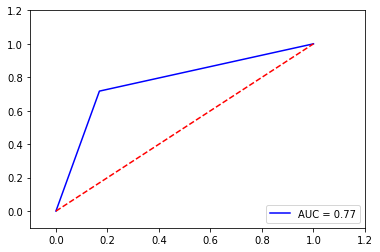

In [58]:
plt.plot(fpr,tpr,'b',label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.show()

In [59]:
#AUC is 0.77 which is not so good. Need to do regularization
#penalty=l1 makes it a Lasso regression

In [60]:
tmodel_lasso = linear_model.LogisticRegression(penalty='l1')

In [61]:
tmodel_lasso.fit(titanicTrain_X,titanicTrain_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
titanicTrain_X.columns

Index(['Fare', 'Pclass__1', 'Pclass__2', 'Pclass__3', 'Sex__female',
       'Sex__male', 'SibSp__0', 'SibSp__1', 'SibSp__2', 'SibSp__3', 'SibSp__4',
       'SibSp__5', 'Parch__0', 'Parch__1', 'Parch__2', 'Parch__3', 'Parch__4',
       'Embarked__C', 'Embarked__Q', 'Embarked__S'],
      dtype='object')

In [63]:
tmodel_lasso.coef_

array([[ 0.00635685,  0.48086504,  0.        , -1.06904464,  1.21371709,
        -1.25460288,  0.47805391,  0.39760034,  0.        , -0.41514561,
        -1.55344956,  0.        , -0.00165098,  0.43324572,  0.59045658,
         0.        ,  0.        ,  0.        ,  0.        , -0.54992967]])

In [64]:
predicted2 = tmodel_lasso.predict(titanicTest_X)

In [65]:
print (metrics.classification_report(titanicTest_Y,predicted2))

             precision    recall  f1-score   support

          0       0.83      0.83      0.83       160
          1       0.72      0.72      0.72        99

avg / total       0.79      0.79      0.79       259



In [66]:
print (metrics.roc_auc_score(titanicTest_Y,predicted2))

0.774210858586


In [67]:
#Using Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
tmodel_nb = GaussianNB()

In [70]:
tmodel_nb.fit(titanicTrain_X,titanicTrain_Y)

GaussianNB(priors=None)

In [71]:
predicted3 = tmodel_nb.predict(titanicTest_X)

In [72]:
print (metrics.classification_report(titanicTest_Y, predicted3))

             precision    recall  f1-score   support

          0       0.62      0.05      0.09       160
          1       0.38      0.95      0.54        99

avg / total       0.53      0.39      0.27       259



In [73]:
predicted2

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1], dtype=int64)

In [74]:
titanic1 = pd.read_csv('Titanic/train.csv')
titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
del titanic1['Cabin']
del titanic1['Ticket']
del titanic1['Embarked']
del titanic1['Name']

In [76]:
del titanic1['PassengerId']

In [77]:
#Doing cross tabulation as NB doesnt understand chars
Sex_dummy = pd.get_dummies(titanic1['Sex'], prefix='Sex_')
titanicDF1 = pd.concat([titanic1,Sex_dummy],axis=1)
titanicDF1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Sex__female,Sex__male
0,0,3,male,22.0,1,0,7.2500,0,1
1,1,1,female,38.0,1,0,71.2833,1,0
2,1,3,female,26.0,0,0,7.9250,1,0
3,1,1,female,35.0,1,0,53.1000,1,0
4,0,3,male,35.0,0,0,8.0500,0,1


In [78]:
del titanicDF1['Sex']

In [79]:
titanicDF1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex__female,Sex__male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [80]:
imp1 = Imputer(axis=0,strategy='median',missing_values='NaN')
temp = imp1.fit_transform(titanicDF1.Age.reshape(-1,1))
titanicDF1['Age'] = temp

C:\Users\harsmoha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [81]:
print (titanicDF1['Age'].isnull().sum())

0


In [82]:
titanicDF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Sex__female    891 non-null uint8
Sex__male      891 non-null uint8
dtypes: float64(2), int64(4), uint8(2)
memory usage: 43.6 KB


In [83]:
titanic1_train, titanic1_test = train_test_split(titanicDF1, test_size=0.2, random_state=10)

In [84]:
titanic1_train_X = titanic1_train.iloc[:,range(1,titanicDF1.shape[1])]
titanic1_train_X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex__female,Sex__male
57,3,28.5,0,0,7.2292,0,1
717,2,27.0,0,0,10.5000,1,0
431,3,28.0,1,0,16.1000,1,0
633,1,28.0,0,0,0.0000,0,1
163,3,17.0,0,0,8.6625,0,1


In [85]:
titanic1_train_Y = titanic1_train.Survived
titanic1_train_Y.head()

57     0
717    1
431    1
633    0
163    0
Name: Survived, dtype: int64

In [86]:
titanic1_test_X = titanic1_test.iloc[:,range(1,titanicDF1.shape[1])]
titanic1_test_Y = titanic1_test.Survived

In [87]:
tmodel_nb1 = GaussianNB()

In [88]:
tmodel_nb1.fit(titanic1_train_X,titanic1_train_Y)

GaussianNB(priors=None)

In [89]:
predicted4 = tmodel_nb1.predict(titanic1_test_X)

In [90]:
print (metrics.classification_report(titanic1_test_Y, predicted4))

             precision    recall  f1-score   support

          0       0.84      0.88      0.86       117
          1       0.75      0.69      0.72        62

avg / total       0.81      0.82      0.81       179



In [91]:
tmodel_nb1.score(titanic1_test_X,titanic1_test_Y)

0.81564245810055869

In [92]:
#Using KNN
from sklearn.neighbors import KNeighborsClassifier

In [93]:
score = []
for i in range(1,20):
    knn = KNeighborsClassifier(i)
    knn.fit(titanicTrain_X, titanicTrain_Y)
    score.append(knn.score(titanicTest_X, titanicTest_Y))    

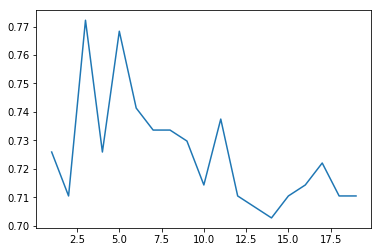

In [94]:
plt.plot(range(1,20), score)
plt.show()

In [95]:
knn1 = KNeighborsClassifier(n_neighbors=3)

In [96]:
knn1.fit(titanicTrain_X, titanicTrain_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [97]:
predicted5 = knn1.predict(titanicTest_X)

In [98]:
print (metrics.classification_report(titanicTest_Y, predicted5))

             precision    recall  f1-score   support

          0       0.81      0.82      0.82       160
          1       0.71      0.69      0.70        99

avg / total       0.77      0.77      0.77       259



In [99]:
print (metrics.roc_auc_score(titanicTest_Y, predicted5))

0.755934343434


In [100]:
#Using gridsearchcv to find best parameters for KNN
from sklearn.model_selection import GridSearchCV

In [101]:
knn2 = KNeighborsClassifier()
params = [{"n_neighbors":range(1,20)}]
gridsearch = GridSearchCV(estimator = knn2, cv=10, param_grid=params)

In [102]:
gridsearch.fit(titanicTrain_X, titanicTrain_Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': range(1, 20)}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [103]:
gridsearch.best_params_

{'n_neighbors': 6}

In [104]:
gridsearch.grid_scores_

C:\Users\harsmoha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.75249, std: 0.07929, params: {'n_neighbors': 1},
 mean: 0.73920, std: 0.05414, params: {'n_neighbors': 2},
 mean: 0.75581, std: 0.04504, params: {'n_neighbors': 3},
 mean: 0.75083, std: 0.03412, params: {'n_neighbors': 4},
 mean: 0.75914, std: 0.05125, params: {'n_neighbors': 5},
 mean: 0.76080, std: 0.03950, params: {'n_neighbors': 6},
 mean: 0.73920, std: 0.04292, params: {'n_neighbors': 7},
 mean: 0.74917, std: 0.04890, params: {'n_neighbors': 8},
 mean: 0.74252, std: 0.03453, params: {'n_neighbors': 9},
 mean: 0.73422, std: 0.04863, params: {'n_neighbors': 10},
 mean: 0.72259, std: 0.04645, params: {'n_neighbors': 11},
 mean: 0.71429, std: 0.05315, params: {'n_neighbors': 12},
 mean: 0.71927, std: 0.05579, params: {'n_neighbors': 13},
 mean: 0.70930, std: 0.05278, params: {'n_neighbors': 14},
 mean: 0.71429, std: 0.05938, params: {'n_neighbors': 15},
 mean: 0.71429, std: 0.04849, params: {'n_neighbors': 16},
 mean: 0.72259, std: 0.04927, params: {'n_neighbors': 17},
 mean:

In [105]:
#Using gradient descent with regularization

In [106]:
titanicTrain, titanicTest = train_test_split(titanicDF,test_size=0.2,random_state=45)

In [107]:
titanicTrain_X_Proper = titanicTrain.iloc[:,list(range(6,9)) + list(range(10,11)) + list(range(12,17)) + 
                                                 list(range(18,22)) + list(range(23,25))]
titanicTrain_X_Proper.head()

,Fare,Pclass__1,Pclass__2,Sex__female,SibSp__0,SibSp__1,SibSp__2,SibSp__3,SibSp__4,Parch__0,Parch__1,Parch__2,Parch__3,Embarked__C,Embarked__Q
515,34.0208,1,0,0,1,0,0,0,0,1,0,0,0,0,0
798,7.2292,0,0,0,1,0,0,0,0,1,0,0,0,1,0
29,7.8958,0,0,0,1,0,0,0,0,1,0,0,0,0,0
426,26.0000,0,1,1,0,1,0,0,0,1,0,0,0,0,0
674,0.0000,0,1,0,1,0,0,0,0,1,0,0,0,0,0


In [108]:
titanicTest_X_Proper = titanicTest.iloc[:,list(range(6,9)) + list(range(10,11)) + list(range(12,17)) + 
                                                 list(range(18,22)) + list(range(23,25))]
titanicTest_X_Proper.columns

Index(['Fare', 'Pclass__1', 'Pclass__2', 'Sex__female', 'SibSp__0', 'SibSp__1',
       'SibSp__2', 'SibSp__3', 'SibSp__4', 'Parch__0', 'Parch__1', 'Parch__2',
       'Parch__3', 'Embarked__C', 'Embarked__Q'],
      dtype='object')

In [109]:
titanicTrain_gradient_X = titanicTrain_X_Proper
titanicTest_gradient_X = titanicTest_X_Proper

In [110]:
titanicTrain_Y = titanicTrain.Survived
titanicTrain_Y.head()

515    0
798    0
29     0
426    1
674    0
Name: Survived, dtype: int64

In [111]:
titanicTrain_gradient_Y = np.array([titanicTrain_Y]).transpose()
titanicTrain_gradient_Y.shape

(688, 1)

In [112]:
theta1_practice = np.array([1,2],ndmin=2).transpose()
theta1_practice.shape

(2, 1)

In [113]:
X_practice = np.array([(1,2),(2,1),(2,3)],ndmin=2).transpose()
X_practice

array([[1, 2, 2],
       [2, 1, 3]])

In [114]:
Y_practice = np.array([1,0,1],ndmin=2).transpose()
Y_practice

array([[1],
       [0],
       [1]])

In [115]:
theta1X = np.dot(theta1_practice.transpose(),X_practice)
theta1X

array([[5, 4, 8]])

In [116]:
exp = np.divide(1,np.exp(theta1X))
exp

array([[ 0.00673795,  0.01831564,  0.00033546]])

In [117]:
hx_practice = np.divide(1, np.add(1,exp))
hx_practice

array([[ 0.99330715,  0.98201379,  0.99966465]])

In [118]:
costerror_practice = np.subtract(hx_practice,Y_practice.transpose())
costerror_practice

array([[ -6.69285092e-03,   9.82013790e-01,  -3.35350130e-04]])

In [119]:
costerror_practice_1 = np.divide(np.add(np.multiply(np.log10(hx_practice),Y_practice.transpose()),
                      np.multiply(np.subtract(1,Y_practice.transpose()),np.log10(np.subtract(1,hx_practice)))),Y_practice.shape[0])
#errorSum = costerror_practice_1.sum()
#errorSum
costerror_practice_1*3

array([[ -2.91643879e-03,  -1.74506034e+00,  -1.45665137e-04]])

In [120]:
hx_practice2 = np.divide(1,np.add(1,np.divide(1,np.exp(np.dot(theta1_practice.transpose(),X_practice)))))
hx_practice2

array([[ 0.99330715,  0.98201379,  0.99966465]])

In [121]:
#thetanew = np.random.randint(0,50,size=(titanicTrain_gradient_X().shape[0],1))
#thetanew.shape

In [122]:
titanicTrain_gradient_Y.min()

0

In [123]:
titanicTrain_gradient_Y.shape[0]

688

In [124]:
 from scipy.special import expit

In [125]:
titanicTrain_gradient_X.shape

(688, 15)

In [126]:
def getJTheta(p_theta, p_titanicTrain_gradient_X, p_titanicTrain_gradient_Y):
    thetaX = np.dot(p_theta.transpose(),p_titanicTrain_gradient_X())
    eThetaX = expit(-thetaX)
    denom = np.add(1,eThetaX)
    hx = np.divide(1,denom)
    p_hxNewLogSafe = np.subtract(hx,epsilon)
    jTheta = np.add(np.multiply(p_titanicTrain_gradient_Y.transpose(),np.log(p_hxNewLogSafe)),
                      np.multiply(np.subtract(1,p_titanicTrain_gradient_Y.transpose()),np.log(np.subtract(1,p_hxNewLogSafe))))
    return jTheta     

In [127]:
def calculateGradientOfJ(p_theta,p_titanicTrain_gradient_X, p_titanicTrain_gradient_Y, p_epsilon):    
    JPlus = getJTheta(np.add(p_theta,epsilon), p_titanicTrain_gradient_X, p_titanicTrain_gradient_Y)
    JMinus = getJTheta(np.subtract(p_theta,epsilon), p_titanicTrain_gradient_X, p_titanicTrain_gradient_Y)
    JDiff = np.divide(np.subtract(JPlus,JMinus),titanicTrain_gradient_Y.shape[0])
    JDiff
    return JDiff

In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
scalar = StandardScaler()

In [130]:
titanicTrain_gradient_X.head()

,Fare,Pclass__1,Pclass__2,Sex__female,SibSp__0,SibSp__1,SibSp__2,SibSp__3,SibSp__4,Parch__0,Parch__1,Parch__2,Parch__3,Embarked__C,Embarked__Q
515,34.0208,1,0,0,1,0,0,0,0,1,0,0,0,0,0
798,7.2292,0,0,0,1,0,0,0,0,1,0,0,0,1,0
29,7.8958,0,0,0,1,0,0,0,0,1,0,0,0,0,0
426,26.0000,0,1,1,0,1,0,0,0,1,0,0,0,0,0
674,0.0000,0,1,0,1,0,0,0,0,1,0,0,0,0,0


In [131]:
titanicTrain_gradient_sc_T_X = scalar.fit_transform(titanicTrain_gradient_X)
print (titanicTrain_gradient_sc_T_X.shape)
titanicTrain_gradient_sc_X = titanicTrain_gradient_sc_T_X
#titanicTrain_gradient_sc_X = titanicTrain_gradient_sc_T_X.transpose()
#print (titanicTrain_gradient_sc_X.shape)

(688, 15)


In [132]:
titanicTrain_gradient_sc_X[:,0]

array([  1.40856514e-01,  -5.84689921e-01,  -5.66637649e-01,
        -7.63557033e-02,  -7.80464726e-01,  -3.60707424e-01,
        -2.72693796e-01,   7.49504602e-01,  -4.28410215e-01,
        -3.71539871e-01,  -5.66637649e-01,  -7.80464726e-01,
         3.19687618e-02,   4.55093199e-02,   5.92267484e+00,
        -7.63557033e-02,  -5.84803661e-01,  -3.44458754e-01,
        -5.69909047e-01,  -5.70586075e-01,  -5.62461740e-01,
        -5.67764223e-01,   2.75698808e-01,  -3.51229034e-01,
        -5.65846880e-01,   1.29744766e+00,  -3.87788540e-01,
         3.32367845e+00,  -5.84689921e-01,  -5.84803661e-01,
        -1.50828773e-01,  -5.69909047e-01,  -5.70810849e-01,
        -2.98420857e-01,  -5.65846880e-01,  -5.84126633e-01,
        -1.26455768e-01,  -7.80464726e-01,  -5.65846880e-01,
        -5.89542857e-01,  -6.85698824e-02,   1.13212111e-01,
        -4.28410215e-01,  -4.28410215e-01,  -5.62461740e-01,
         5.90498781e-02,  -3.54161918e-01,  -4.37888606e-01,
         3.32367845e+00,

In [133]:
X_gradient1 = np.ones(titanicTrain_gradient_sc_X.shape[0])
X_gradient2 = np.c_[X_gradient1,titanicTrain_gradient_sc_X]
X_gradient2.shape

(688, 16)

In [134]:
#X_gradient2[:,0]

In [135]:
titanicTrain_gradient_sc_X = X_gradient2.transpose
titanicTrain_gradient_sc_X().shape

(16, 688)

In [136]:
titanicTrain_gradient_sc_X()[0,:]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [137]:
#calculateGradientOfJ(theta1_practice,X_practice,Y_practice,0.1).shape

In [185]:
iteration = 20000
#iteration = 50000
initialThetaSeed = 10
np.random.seed(initialThetaSeed)
thetanew = np.random.randint(0,initialThetaSeed,size=(titanicTrain_gradient_sc_X().shape[0],1))
theta = thetanew
errorLog = np.empty(iteration)
gradientDiffLog = np.empty(iteration)
#lambdaa = 0.48
#alpha = 0.0043
lambdaa = 0.1
alpha = 0.7
epsilon = 0.001
for i in range(iteration):
    thetaX = np.dot(theta.transpose(),titanicTrain_gradient_sc_X())
    eThetaX = expit(-thetaX)
    denom = np.add(1,eThetaX)
    hx = np.divide(1,denom)
    diff = np.subtract(hx,titanicTrain_gradient_Y.transpose())    
    derivative = np.dot(diff,titanicTrain_gradient_sc_X().transpose())
    #print (derivative)
    #gradientDiffLog[i] = np.multiply(np.divide(np.subtract(calculateGradientOfJ(theta,titanicTrain_gradient_X,titanicTrain_gradient_Y, epsilon),
                                   #derivative),derivative),100)
    #gradientDiffLog[i] =  np.subtract(calculateGradientOfJ(theta,titanicTrain_gradient_X,titanicTrain_gradient_Y, epsilon),
     #                               derivative)
    #theta = np.subtract(thetanew, np.multiply((alpha/titanicTrain_gradient_X().shape[1]),derivative.transpose()))
    #Implementing regularization    
   
    #print ("before", thetaRegularized)
    thetaRegularized = thetanew*(1-(alpha*lambdaa/titanicTrain_gradient_sc_X().shape[1]))
    #print ("after", thetaRegularized)
    #Not regularizing theta0 (the constant)
    thetaRegularized[0][0] = thetaRegularized[0][0]/(1-(alpha*lambdaa/titanicTrain_gradient_sc_X().shape[1]))
    #print ("after adjustment", thetaRegularized)
    #print (np.multiply((alpha/titanicTrain_gradient_sc_X.shape[1]),derivative.transpose()))
    theta = np.subtract(thetaRegularized,np.multiply((alpha/titanicTrain_gradient_sc_X().shape[1]),derivative.transpose()))
    thetaXNew = np.dot(theta.transpose(),titanicTrain_gradient_sc_X())
    eThetaXNew = expit(-thetaXNew)
    denomNew = np.add(1,eThetaXNew)
    hxNew = np.divide(1,denomNew)
    hxNewLogSafe = np.subtract(hxNew,epsilon)
   # print (derivative.shape)
    costerror = -np.divide(np.add(np.multiply(titanicTrain_gradient_Y.transpose(),np.log(hxNewLogSafe)),
                      np.multiply(np.subtract(1,titanicTrain_gradient_Y.transpose()),np.log(np.subtract(1,hxNewLogSafe)))),
                          titanicTrain_gradient_Y.shape[0])
    #print (costerror.shape)
    errorLog[i] = costerror.sum()
    """if(i!=0 and (errorLog[i] > errorLog[i-1])):
        print ("i=", i)
        break
        """
    thetanew = theta
    

In [186]:
100*(errorLog[iteration-2] - errorLog[iteration-1])/errorLog[iteration-2]

0.0036451283600808719

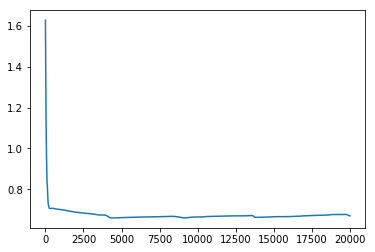

In [188]:
plt.plot(range(iteration),errorLog)
plt.show()

In [189]:
def getPredictedFromGradient(theta_p,testX_p):
    thetaX = np.dot(theta_p.transpose(),testX_p())
    denom = np.add(1,expit(-thetaX))
    hx = np.divide(1,denom)
    #print (hx)
    hxT = hx.transpose()          
    return hxT

In [190]:
titanicTrain_gradient_X.transpose().shape

(15, 688)

In [191]:
titanicTest_gradient_X.transpose().shape

(15, 173)

In [192]:
titanicTest_gradient_sc_T_X = scalar.transform(titanicTest_gradient_X)
#print (titanicTest_gradient_sc_T_X.shape)
titanicTest_gradient_sc_X = titanicTest_gradient_sc_T_X
#titanicTest_gradient_sc_X = titanicTest_gradient_sc_T_X.transpose()
print (titanicTest_gradient_sc_X.shape)

(173, 15)


In [193]:
X_t_gradient1 = np.ones(titanicTest_gradient_sc_X.shape[0])
X_t_gradient2 = np.c_[X_t_gradient1,titanicTest_gradient_sc_X]
titanicTest_gradient_sc_X = X_t_gradient2.transpose

In [194]:
titanicTest_gradient_sc_X().shape

(16, 173)

In [195]:
titanicTest_Y = titanicTest.Survived
titanicTest_gradient_Y = np.array([titanicTest_Y]).transpose()
titanicTest_gradient_Y.shape

(173, 1)

In [196]:
predicted_gradient = getPredictedFromGradient(theta,titanicTest_gradient_sc_X)

In [197]:
for i in range(0,predicted_gradient.shape[0]):
    if predicted_gradient[i][0] > 0.51:
        predicted_gradient[i][0] = 1
    else:
        predicted_gradient[i][0] = 0

In [198]:
print (metrics.classification_report(titanicTest_gradient_Y, predicted_gradient))

             precision    recall  f1-score   support

          0       0.64      0.99      0.78       101
          1       0.94      0.22      0.36        72

avg / total       0.77      0.67      0.60       173



In [199]:
print (metrics.roc_auc_score(titanicTest_gradient_Y, predicted_gradient))

0.606160616062


In [200]:
#Using Logistic regression
tmodel_log1 = linear_model.LogisticRegression(C=0.2)

tmodel_log1.fit(titanicTrain_X_Proper,titanicTrain_Y)

predicted_log1 = tmodel_log1.predict(titanicTest_X_Proper)

print (metrics.classification_report(titanicTest_Y, predicted_log1))

             precision    recall  f1-score   support

          0       0.82      0.83      0.83       101
          1       0.76      0.75      0.76        72

avg / total       0.80      0.80      0.80       173



In [201]:
#Using Neural Networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [215]:
titanicTrain_X_Proper.shape

(688, 15)

In [216]:
np.random.seed(10)
dropoutrate = 0.1
def buildClassifier():
    classifier = Sequential()
    classifier.add(Dense(8, activation='relu', input_dim=15, kernel_initializer='uniform'))
    classifier.add(Dropout(dropoutrate))
    classifier.add(Dense(8, activation='relu', kernel_initializer='uniform'))
    classifier.add(Dropout(dropoutrate))
    classifier.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
    #classifier.build(input_shape=15)
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return classifier

In [217]:
classifier = KerasClassifier(build_fn=buildClassifier, epochs=300, batch_size=5)
#Kfold = cross_val_score(estimator=classifier,cv=10,X=scalar.fit_transform(titanicTrain_X_Proper),y=titanicTrain_Y)

In [218]:
#mean = Kfold.mean()
#mean

In [219]:
classifier.fit(scalar.fit_transform(titanicTrain_X_Proper), titanicTrain_Y)
predicted_NN = classifier.predict(scalar.transform(titanicTest_X_Proper))

Epoch 1/300
688/688 [==============================] - 1s 754us/step - loss: 0.6795 - acc: 0.6206
Epoch 2/300
688/688 [==============================] - 0s 201us/step - loss: 0.5833 - acc: 0.6802
Epoch 3/300
688/688 [==============================] - 0s 183us/step - loss: 0.5257 - acc: 0.7791
Epoch 4/300
688/688 [==============================] - 0s 198us/step - loss: 0.4920 - acc: 0.7791
Epoch 5/300
688/688 [==============================] - 0s 186us/step - loss: 0.4841 - acc: 0.7805
Epoch 6/300
688/688 [==============================] - 0s 192us/step - loss: 0.4697 - acc: 0.7892
Epoch 7/300
688/688 [==============================] - 0s 222us/step - loss: 0.4709 - acc: 0.7965
Epoch 8/300
688/688 [==============================] - 0s 202us/step - loss: 0.4689 - acc: 0.7936
Epoch 9/300
688/688 [==============================] - 0s 185us/step - loss: 0.4538 - acc: 0.8023
Epoch 10/300
688/688 [==============================] - 0s 214us/step - loss: 0.4584 - acc: 0.7980
Epoch 11/300
688/68

688/688 [==============================] - 0s 221us/step - loss: 0.4147 - acc: 0.8212
Epoch 84/300
688/688 [==============================] - 0s 247us/step - loss: 0.4124 - acc: 0.8285
Epoch 85/300
688/688 [==============================] - 0s 249us/step - loss: 0.4199 - acc: 0.8256
Epoch 86/300
688/688 [==============================] - 0s 233us/step - loss: 0.4169 - acc: 0.8372
Epoch 87/300
688/688 [==============================] - 0s 240us/step - loss: 0.4105 - acc: 0.8343
Epoch 88/300
688/688 [==============================] - 0s 243us/step - loss: 0.4324 - acc: 0.8241
Epoch 89/300
688/688 [==============================] - 0s 249us/step - loss: 0.4229 - acc: 0.8198
Epoch 90/300
688/688 [==============================] - 0s 250us/step - loss: 0.4205 - acc: 0.8285
Epoch 91/300
688/688 [==============================] - 0s 243us/step - loss: 0.4106 - acc: 0.8299
Epoch 92/300
688/688 [==============================] - 0s 240us/step - loss: 0.4190 - acc: 0.8169
Epoch 93/300
688/688 [=

688/688 [==============================] - 0s 212us/step - loss: 0.3996 - acc: 0.8299
Epoch 166/300
688/688 [==============================] - 0s 244us/step - loss: 0.3966 - acc: 0.8328 0s - loss: 0.3770 - acc: 0.8
Epoch 167/300
688/688 [==============================] - 0s 246us/step - loss: 0.4041 - acc: 0.8372
Epoch 168/300
688/688 [==============================] - 0s 215us/step - loss: 0.4041 - acc: 0.8328
Epoch 169/300
688/688 [==============================] - 0s 254us/step - loss: 0.4035 - acc: 0.8285
Epoch 170/300
688/688 [==============================] - 0s 240us/step - loss: 0.4066 - acc: 0.8358
Epoch 171/300
688/688 [==============================] - 0s 221us/step - loss: 0.4010 - acc: 0.8401
Epoch 172/300
688/688 [==============================] - 0s 251us/step - loss: 0.4137 - acc: 0.8299
Epoch 173/300
688/688 [==============================] - 0s 238us/step - loss: 0.3952 - acc: 0.8387
Epoch 174/300
688/688 [==============================] - 0s 249us/step - loss: 0.4116

688/688 [==============================] - 0s 206us/step - loss: 0.4018 - acc: 0.8343
Epoch 247/300
688/688 [==============================] - 0s 179us/step - loss: 0.4039 - acc: 0.8328
Epoch 248/300
688/688 [==============================] - 0s 192us/step - loss: 0.3941 - acc: 0.8445
Epoch 249/300
688/688 [==============================] - 0s 201us/step - loss: 0.3978 - acc: 0.8358
Epoch 250/300
688/688 [==============================] - 0s 179us/step - loss: 0.3923 - acc: 0.8387
Epoch 251/300
688/688 [==============================] - 0s 201us/step - loss: 0.3988 - acc: 0.8358
Epoch 252/300
688/688 [==============================] - 0s 203us/step - loss: 0.3982 - acc: 0.8372
Epoch 253/300
688/688 [==============================] - 0s 270us/step - loss: 0.4058 - acc: 0.8401
Epoch 254/300
688/688 [==============================] - 0s 225us/step - loss: 0.4076 - acc: 0.8343
Epoch 255/300
688/688 [==============================] - 0s 244us/step - loss: 0.3982 - acc: 0.8343
Epoch 256/300


In [220]:
print (metrics.classification_report(titanicTest_Y, predicted_NN))

             precision    recall  f1-score   support

          0       0.76      0.89      0.82       101
          1       0.80      0.61      0.69        72

avg / total       0.78      0.77      0.77       173



In [221]:
print (metrics.roc_auc_score(titanicTest_gradient_Y, predicted_NN))

0.751100110011
